# NLP Sentiment Classification Project

## Data Loading and Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('yelp.csv')

### Display the first 10 rows of the dataset

In [3]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Print out the dataset columns

In [4]:
print(df.columns)

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


### Provide a summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Plot a histogram to check the reviews' text length

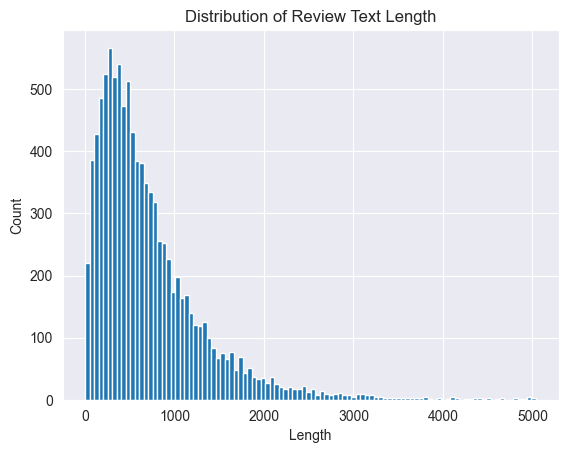

In [6]:
from matplotlib import pyplot as plt
df.text.str.len().hist(bins=100)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Review Text Length")
plt.show()

### Display random review ratings and their text representation.

In [7]:
N = 200
print("Sample review rating:", df.iloc[N].stars)
print("Sample review text:", df.iloc[N].text)

Sample review rating: 5
Sample review text: Who dosen't like Cosco, I love this place. The pizza is cheap and good.


### Analyze the distribution of reviews across different rating categories using visualizations

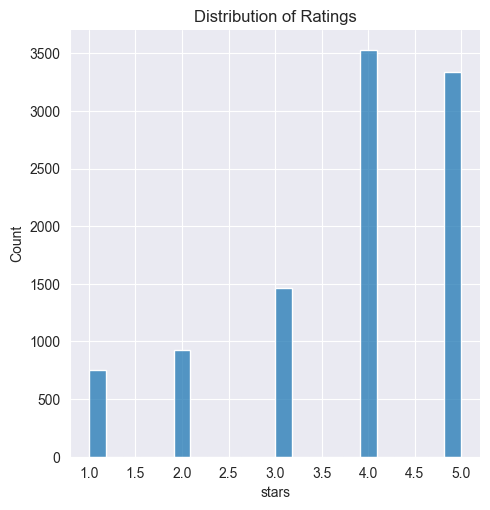

In [8]:
import seaborn as sns
sns.displot(df["stars"])
plt.title("Distribution of Ratings")
plt.show()

### Data Preprocessing

In [9]:
df = pd.read_csv('yelp.csv')

### Map 1-star reviews to represent negative sentiment (0) and 5-star reviews to represent positive sentiment (1).

In [10]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]
df["label"] = df["stars"].map({1: 0, 5: 1})

X_Data = df["text"]
Y_Data = df["label"]

## Convert text data into numerical representations using the sentence transformer model

In [ ]:
from typing import List 
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")


def get_text_embeddings(encoder, text: List[str]) -> List[np.ndarray]:
    return encoder.encode(text)

In [12]:
texts = df.text.tolist()

In [13]:
embeddings = get_text_embeddings(sentence_transformer, texts)

### Check the shape, embedding length, and norm of the numerical representations

In [14]:
embeddings.shape

(4086, 384)

In [15]:
len(embeddings[0])

384

In [16]:
np.linalg.norm(embeddings[0])

0.99999994

In [17]:
df = df.assign(embeddings = [e for e in embeddings])

### Store the sentence embedding DataFrame in feather format for efficient data handling

In [18]:
df.reset_index(inplace=True)
df.to_feather("yelp_with_embeddings.bin")

## Model Building

In [19]:
import torch
import torch.nn as nn

# Define the ReviewClassifier
class ReviewClassifier(nn.Module):
    def __init__(self, input_dim=384, hidden_dim1=150, hidden_dim2=15, output_dim=1):
        super(ReviewClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.BatchNorm1d(hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.BatchNorm1d(hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [20]:
df = pd.read_feather("yelp_with_embeddings.bin")

### Use numerical representations of text reviews for model input

In [21]:
df.embeddings[0]

array([-2.69870870e-02,  1.21111218e-02,  1.03444263e-01,  5.85587248e-02,
       -6.46284223e-02, -1.29983127e-02, -6.94513842e-02, -4.23906259e-02,
       -4.72875647e-02, -7.47565776e-02,  2.75893311e-04, -1.09934276e-02,
       -2.56671179e-02, -6.28251210e-02, -1.99138708e-02, -7.65453056e-02,
        1.74198315e-01, -1.34243011e-01, -1.75687019e-02, -4.12424356e-02,
       -1.09441169e-01, -4.82605211e-02,  4.82458770e-02, -1.33555774e-02,
        5.59582375e-02,  5.01586609e-02,  2.06091125e-02,  4.79414314e-02,
       -4.90631424e-02, -4.00309227e-02, -2.74517313e-02,  6.48624748e-02,
       -4.05024402e-02, -4.38724458e-03, -2.46323515e-02,  4.45185751e-02,
        9.24157351e-02, -1.14275217e-01,  5.28180040e-02, -3.53384792e-04,
        2.43185665e-02, -4.42525595e-02,  5.36391996e-02, -2.23462954e-02,
        2.35288702e-02,  4.34743753e-03, -1.30336974e-02,  4.99515906e-02,
       -1.54166203e-02, -6.97716419e-03, -2.35754829e-02,  2.09900853e-03,
        3.75692360e-02, -

In [22]:
df.embeddings[0].shape

(384,)

In [23]:
df.shape

(4086, 13)

### Split data into training, validation, and tests sets

In [24]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [25]:
from torchmetrics import Accuracy, Precision, Recall
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter

# Setup
writer = SummaryWriter() # Logs training metrics 
model = ReviewClassifier() # Model Architecture
loss_function = torch.nn.BCEWithLogitsLoss() # Binary Cross-Entropy Loss with logits
optimizer = torch.optim.Adam(model.parameters()) # The optimizer Adam adjusts the learning rate for each parameter dynamically

batch_size = 128
num_epochs = 60
losses = []

# Training Loop
for epoch in tqdm(range(num_epochs), desc='Training'):
    model.train()
    train_df = train_df.sample(frac=1.0).reset_index(drop=True)  # Shuffle training data
    for i in range(0, len(train_df), batch_size):
        batch_x = np.array(train_df.embeddings[i:i + batch_size].tolist())
        batch_y = np.array(train_df.label[i:i + batch_size].tolist())

        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)

        optimizer.zero_grad() # Clear the gradients
        predictions = model(tensor_batch_x) # Forward pass
        loss = loss_function(predictions, tensor_batch_y) # Compute the loss
        loss.backward() # Backward pass to compute gradients
        optimizer.step() # Update the model parameters

        losses.append(loss.item())

    # Validation Loop
    model.eval()
    accuracy_metric = Accuracy(task='binary')
    precision_metric = Precision(task='binary')
    recall_metric = Recall(task='binary')

    y_true = []
    y_pred = []
    y_pred_prob = []

    with torch.no_grad():
        for _, eval_row in tqdm(val_df.iterrows(), desc='Evaluating', total=len(val_df)):
            embeddings = torch.Tensor(np.array(eval_row.embeddings)).unsqueeze(0)
            label = torch.Tensor([eval_row.label]).reshape(-1, 1)
            prediction = model(embeddings).reshape(-1)

            y_true.append(eval_row.label)
            y_pred.append(int(prediction >= 0.5))
            y_pred_prob.append(prediction.item())

            accuracy_metric.update(prediction, label.reshape(-1))
            precision_metric.update(prediction, label.reshape(-1))
            recall_metric.update(prediction, label.reshape(-1))

    accuracy_value = accuracy_metric.compute().item()
    precision_value = precision_metric.compute().item()
    recall_value = recall_metric.compute().item()

    writer.add_scalar('Metrics/Accuracy', accuracy_value, epoch)
    writer.add_scalar('Metrics/Precision', precision_value, epoch)
    writer.add_scalar('Metrics/Recall', recall_value, epoch)
    
# Close the SummaryWriter
writer.close()

# Test Evaluation
model.eval()
accuracy_metric = Accuracy(task='binary')
precision_metric = Precision(task='binary')
recall_metric = Recall(task='binary')

y_true = []
y_pred = []
y_pred_prob = []

with torch.no_grad():
    for _, test_row in tqdm(test_df.iterrows(), desc='Testing', total=len(test_df)):
        embeddings = torch.Tensor(np.array(test_row.embeddings)).unsqueeze(0)
        label = torch.Tensor([test_row.label]).reshape(-1, 1)
        prediction = model(embeddings).reshape(-1)

        y_true.append(test_row.label)
        y_pred.append(int(prediction >= 0.5))
        y_pred_prob.append(prediction.item())

        accuracy_metric.update(prediction, label.reshape(-1))
        precision_metric.update(prediction, label.reshape(-1))
        recall_metric.update(prediction, label.reshape(-1))

accuracy_value = accuracy_metric.compute().item()
precision_value = precision_metric.compute().item()
recall_value = recall_metric.compute().item()

print(f"Test Accuracy: {accuracy_value:.2f}")
print(f"Test Precision: {precision_value:.2f}")
print(f"Test Recall: {recall_value:.2f}")

Training:   0%|          | 0/60 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Testing:   0%|          | 0/818 [00:00<?, ?it/s]

Test Accuracy: 0.91
Test Precision: 0.94
Test Recall: 0.94


## Visualize the training progress and losses to understand model learning behavior

<Axes: >

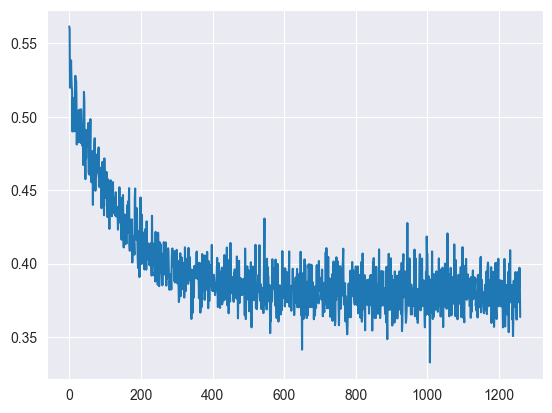

In [27]:
pd.Series(losses).plot()